In [ ]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
data=pd.read_csv("gas_turbines.csv")

In [ ]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
#we need to predict TEY turbine energy yield

In [ ]:
data.shape

(15039, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
data.isnull().sum()
#no null values

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
data.duplicated().sum()
#no duplicate vale

0

In [ ]:
#let us do the label encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data)

In [ ]:

scaled_data.columns=['AT'	,'AP',	'AH',	'AFDP',	'GTEP',	'TIT',	'TAT',	'TEY',	'CDP',	'CO',	'NOX']
scaled_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591


<Axes: >

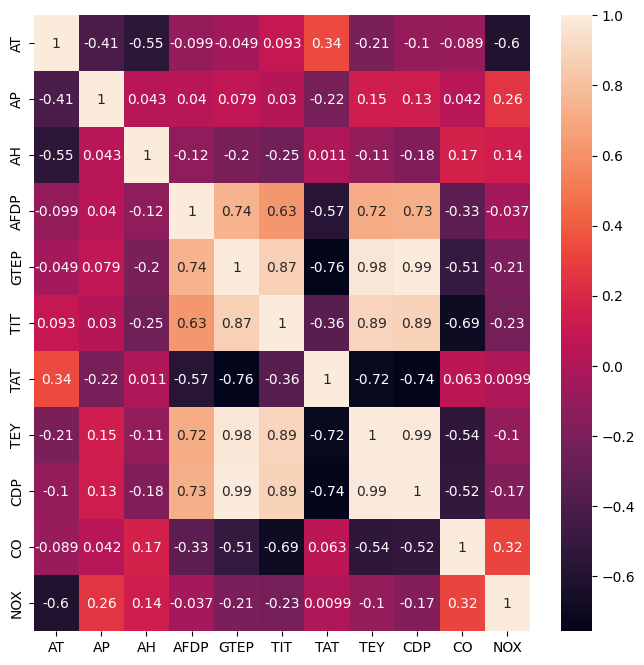

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(scaled_data.corr(), annot=True)

In [ ]:
#TEY is more dependent on AFDP, GTEP, TIT, TAT,CDP

In [ ]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
X=scaled_data.drop(['TEY'], axis=1)

In [ ]:
Y=scaled_data.drop(['AT'	,'AP',	'AH',	'AFDP',	'GTEP',	'TIT',	'TAT',	'CDP',	'CO',	'NOX'], axis=1)

In [ ]:
X=X.values
Y=Y.values

In [ ]:
#Build model

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

Tuning of Hyperparameters :- Batch Size and Epochs

In [ ]:
def create_model():

  model=Sequential()
  model.add(Dense(13, input_dim=10, kernel_initializer='uniform', activation='relu'))    #i/p layers we are giving 11 and for 1st hidden layer we are giving no.of layers as 13
  model.add(Dense(10,  kernel_initializer='uniform', activation='relu' ))
  model.add(Dense(1,  kernel_initializer='uniform', activation='relu' ))     #o/p layer

  adam=Adam(learning_rate=0.01)           #we are adding our optimizer as Adam
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model

In [ ]:
#create model
model= KerasRegressor(build_fn=create_model, verbose=0)
batch_size=[40,70,100]    #we want to tune batch_size and epochs
epochs=[100,150,200]
# Make a dictionary of the grid search parameters
param_grid=dict(batch_size=batch_size, epochs=epochs)
#grid search
grid=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=10)


In [ ]:
grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=40, epochs=100...................................
[CV 1/5; 1/9] END ...batch_size=40, epochs=100;, score=-1.671 total time= 1.4min
[CV 2/5; 1/9] START batch_size=40, epochs=100...................................
[CV 2/5; 1/9] END ....batch_size=40, epochs=100;, score=5.023 total time=  46.7s
[CV 3/5; 1/9] START batch_size=40, epochs=100...................................
[CV 3/5; 1/9] END ....batch_size=40, epochs=100;, score=6.793 total time=  46.3s
[CV 4/5; 1/9] START batch_size=40, epochs=100...................................
[CV 4/5; 1/9] END ....batch_size=40, epochs=100;, score=6.281 total time=  47.6s
[CV 5/5; 1/9] START batch_size=40, epochs=100...................................
[CV 5/5; 1/9] END ....batch_size=40, epochs=100;, score=8.085 total time= 1.4min
[CV 1/5; 2/9] START batch_size=40, epochs=150...................................
[CV 1/5; 2/9] END ....batch_size=40, epochs=150;,

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f84a6f87df0>,
             param_grid={'batch_size': [40, 70, 100],
                         'epochs': [100, 150, 200]},
             verbose=10)

In [ ]:
grid.best_params_, grid.best_score_
#({'batch_size': 40, 'epochs': 100}, 5.340357804298401)

({'batch_size': 40, 'epochs': 100}, 5.340357804298401)

Learning rate and Droput rate tuning

In [ ]:
from keras.layers import Dropout
#defining the model
def create_model(learning_rate, dropout_rate):
  model=Sequential()
  model.add(Dense(13, input_dim=10, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10,  kernel_initializer='uniform', activation='relu' ))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid' ))

  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [ ]:
#create a model
model=KerasRegressor(build_fn=create_model, verbose = 0, batch_size = 40,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate, dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv =5, verbose = 10)



In [ ]:
result=grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=4293391.500 total time= 1.4min
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=4156384.250 total time=  46.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=3909064.500 total time= 1.4min
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=6663551.500 total time= 1.4min
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=4610446.000 total time= 1.4min
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01....

In [ ]:
grid.best_params_, grid.best_score_
#dropout_rate': 0.2, 'learning_rate': 0.1}, 8009872100556.8)
#({'batch_size': 40, 'epochs': 100}, 5.340357804298401)

({'dropout_rate': 0.2, 'learning_rate': 0.1}, 8009872100556.8)


Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(13,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = 5,verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1783.287 total time=  56.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=1685.710 total time= 1.4min
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=1014.096 total time=  53.2s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=1512.877 total time=  54.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=2195.793 total time= 1.4min
[CV 1/5; 2/12] START activation_function=softmax,

In [ ]:
grid.best_params_, grid.best_score_
#'activation_function': 'linear', 'init': 'uniform'}, 18265836984729.6)
#dropout_rate': 0.2, 'learning_rate': 0.1}, 8009872100556.8)
#({'batch_size': 40, 'epochs': 100}, 5.340357804298401)

({'activation_function': 'linear', 'init': 'uniform'}, 18265836984729.6)

Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'linear'))

    adam = Adam(learning_rate = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = 5,verbose = 10)
grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=7.910 total time= 1.4min
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=4.670 total time= 1.4min
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=6.615 total time=  53.2s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=5.825 total time=  51.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=7.752 total time=  52.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f849bcfbf40>,
             param_grid={'neuron1': [4, 8, 16], 'neuron2': [2, 4, 8]},
             verbose=10)

In [ ]:
grid.best_params_, grid.best_score_


({'neuron1': 8, 'neuron2': 4}, 6.601792335510254)

In [ ]:
#'activation_function': 'linear', 'init': 'uniform'}, 18265836984729.6)
#dropout_rate': 0.2, 'learning_rate': 0.1}, 8009872100556.8)
#({'batch_size': 40, 'epochs': 100}, 5.340357804298401)
#({'neuron1': 8, 'neuron2': 4}, 6.601792335510254)

BUILD MODEL WITH OUR HYPERPARAMETERS

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'linear'))

    adam = Adam(learning_rate = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [ ]:
# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(X,Y)


In [ ]:
# Predicting using trained model

y_predict = model.predict(X)